<a href="https://colab.research.google.com/github/Ishita95-harvad/Ishitatheresearchanalyst.github.io/blob/main/Amazon_Recommendation_engine_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Background**

---



E-commerce companies like AMazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.

Collaborative filtering relies on the historical interactions between users and items, such as ratings, purchases, views, or clicks, to identify patterns and generate recommendations. By analyzing these interactions, collaborative filtering algorithms can uncover the latent factors that drive user preferences and item relationships, enabling personalized recommendations that go beyond simple popularity or similarity metrics.

**Objective**

---



You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

**Context**


---


**Introduction to Recommendation systems**    

A recommendation engine is a system or algorithm that analyzes user data and provides personalized suggestions or recommendations for items or content that the user may be interested in. These recommendations are based on various factors such as the user's preferences, historical behavior, demographic information, and similarities to other users.

Recommendation engines are commonly used in e-commerce, OTT plateforms , social media, and other online services to enhance user experience and engagement. They help users discover new products, movies, music, articles, or any other items that align with their interests.

Collaborative filtering has emerged as one of the most powerful and widely used recommendation techniques in the era of big data and personalization. As we are inundated with an ever-growing abundance of choices across various domains, from entertainment to e-commerce, collaborative filtering acts as a guiding light, helping us navigate the vast landscape of options and discover the hidden gems that align with our unique preferences.

**Types of recommendations**

There are mainly 6 types of the recommendations systems :-

Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.

Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.

Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.

Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions

**What recommeder system can solve ?**

It can help the user to find the right product.
It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.


**Types of Collaborative Recommendation Filtering**

*  Similarity/Neighborhood based
*  User-User Similarity Based
*  Item-Item similarity based
*  Model based



**Project Structure**


---

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use Google Colab for this project.

**Workflow**

*   Data Preparation
*  Exploratory Data Analysis
*  Collaborative Filtering
*  Model-Based Collaborative Filtering
*  Recommendation System









**1. Data Preparation**

 1.Import Libraries: Load necessary libraries for data manipulation, visualization, and modeling.

2.Load Data: Download and extract the dataset using Kaggle API, and load it into a Pandas DataFrame.

3.Sample Data: Take a sample of the dataset to optimize performance during analysis.







**Dataset**

The Amazon dataset contains the following attributes:

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)

In [ ]:
import pandas as pd # Import pandas and alias it as 'pd'
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

# Mount Google Drive to access files within it
from google.colab import drive
drive.mount('/content/drive')

# Now try to read the CSV file
# Double-check this path in your Google Drive. Make sure the file exists and the name is exactly the same, including capitalization.
file_path = '/content/drive/MyDrive/Colab Notebooks/ratings_Electronics.csv'
import pandas as pd # Import pandas and alias it as 'pd'
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import os
import importlib
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

# Mount Google Drive to access files within it
from google.colab import drive
drive.mount('/content/drive')

# Now try to read the CSV file
# Double-check this path in your Google Drive. Make sure the file exists and the name is exactly the same, including capitalization.
file_path = ('/content/drive/MyDrive/Colab Notebooks/ratings_Electronics.csv')

if os.path.exists('/content/drive/MyDrive/Colab Notebooks/ratings_Electronics.csv'):
    df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings_Electronics.csv')  # Copy the data to another DataFrame called df
else:
    print(f"Error: File not found at {'/content/drive/MyDrive/Colab Notebooks/ratings_Electronics.csv'}. Please check the file path and make sure the file exists.")
    print(f"Error: File not found at {'/content/drive/MyDrive/Colab Notebooks/ratings_Electronics.csv'}. Please check the file path and make sure the file exists.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error: File not found at /content/drive/MyDrive/Colab Notebooks/ratings_Electronics.csv. Please check the file path and make sure the file exists.
Error: File not found at /content/drive/MyDrive/Colab Notebooks/ratings_Electronics.csv. Please check the file path and make sure the file exists.


Installing surprise library

In [ ]:
# user-defined function to check library is installed or not, if not installed then it will install automatically at runtime.
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            import pip
            pip.main(['install', library_name])
        except:
            print("Error: Failed to install the library. Please install it manually.")

The Amazon product review dataset is huge, size of the dataset is 320 MB so it's recommended to download using the Kaggle repository which will be handy for further execution and will save your time and resources.

**2. Exploratory Data Analysis**

*  Data Overview: Observe data structure, handle missing values, and drop unnecessary columns.

*  Descriptive Analysis: Understand the relationship between features, and visualize the distribution of ratings.

* Data Overview: Observe data structure, handle
missing values, and drop unnecessary columns.

* Descriptive Analysis: Understand the relationship between features, and visualize the distribution of ratings.

* User and Product Statistics: Analyze the number of ratings per user and per product.

In [ ]:
!pip install opendatasets --upgrade --quiet # Upgrade opendatasets
!pip install scikit-surprise
import pandas as pd
import os  # Import the os module
import opendatasets as od
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict

# Check if the dataset is already downloaded
dataset_name = "amazon-product-reviews"
if dataset_name not in os.listdir():
    od.download("https://www.kaggle.com/datasets/irvifa/amazon-product-reviews")

# ... (Rest of the code remains the same)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505177 sha256=b188e86e4085810ba5982e76faa8a1edb210a645f2bdc54ffeb24f2e52b5da46
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ishitabahamnia
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/irvifa/amazon-product-reviews


100%|██████████| 109M/109M [00:01<00:00, 83.4MB/s]


In [ ]:
df.shape

(7824482, 4)

In [ ]:
df.columns

Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

Since our dataset is too big and it will be difficult to analyze the entire dataset due to limited resources,thats'why I am randomly taking 20% of the data as sample out of the whole dataset which is 1564896.

In [ ]:
electronics_data=df.sample(n=1564896,ignore_index=True)

In [ ]:
#after taking samples drop df to release the memory occupied by entire dataframe
#del df

In [ ]:
#print top 5 records of the dataset
electronics_data.head()

,userId,productId,rating,timestamp
0,A1OEPMK1SW5X0N,B00109Y2DQ,5.0,1217116800
1,A2W5IWO2KPVXML,B0057D51ZY,5.0,1366588800
2,A1L7BO05COYTBS,B008KWPHGM,3.0,1364083200
3,A1SFJZ7LGWJG7Q,B002ECZ89U,4.0,1394496000
4,A3TTZSJE13IDV2,B004U7JYXS,5.0,1394928000


In [ ]:
#print the concise information of the dataset
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564896 entries, 0 to 1564895
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1564896 non-null  object 
 1   productId  1564896 non-null  object 
 2   rating     1564896 non-null  float64
 3   timestamp  1564896 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 47.8+ MB


In [ ]:
electronics_data.describe()

,rating,timestamp
count,1.564896e+06,1.564896e+06
mean,4.012281e+00,1.338088e+09
std,1.380451e+00,6.915350e+07
min,1.000000e+00,9.146304e+08
25%,3.000000e+00,1.315267e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


We will now have a look at the min and max values of the 'Rating' column. We are only dealing with reviews having rating values from 1-5, so if we find values outside the above stated range, we will have to deal with those entries.

In [ ]:
#handle missing values
electronics_data.isnull().sum()

,0
userId,0
productId,0
rating,0
timestamp,0


In [ ]:
#handling duplicate records
electronics_data[electronics_data.duplicated()].shape[0]

0

In [ ]:
electronics_data.head()

,userId,productId,rating,timestamp
0,A1OEPMK1SW5X0N,B00109Y2DQ,5.0,1217116800
1,A2W5IWO2KPVXML,B0057D51ZY,5.0,1366588800
2,A1L7BO05COYTBS,B008KWPHGM,3.0,1364083200
3,A1SFJZ7LGWJG7Q,B002ECZ89U,4.0,1394496000
4,A3TTZSJE13IDV2,B004U7JYXS,5.0,1394928000


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

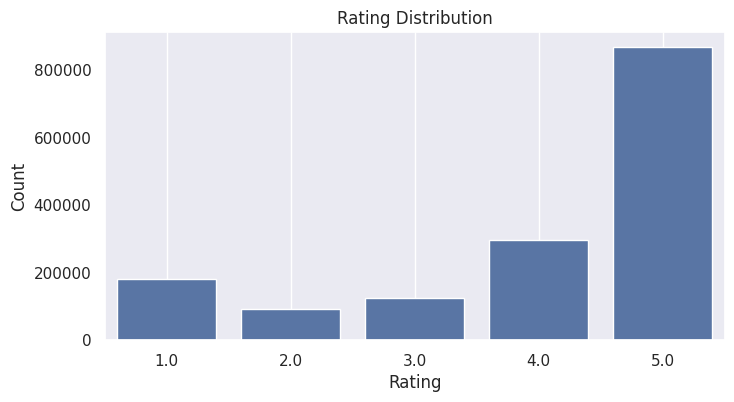

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating',data=electronics_data)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

Above graphs shows:most of the user have given 5 rating.Reviews having rating values from 1-5

In [ ]:
print('Total rating : ',electronics_data.shape[0])
print('Total unique users : ',electronics_data['userId'].unique().shape[0])
print('Total unique products : ',electronics_data['productId'].unique().shape[0])

Total rating :  1564896
Total unique users :  1226027
Total unique products :  237714


In [ ]:
no_of_rated_products_per_user = electronics_data.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

,rating
userId,
ADLVFFE4VBT8,105
A3OXHLG6DIBRW8,95
A680RUE1FDO8B,85
A5JLAU2ARJ0BO,84
ARBKYIVNYWK3C,83


In [ ]:
print('No of rated product more than 50 per user : {} '.format(sum(no_of_rated_products_per_user >= 50)))

No of rated product more than 50 per user : 25 


**Observation**

As mentioned before. The 'rating' column has five unique values (5.0, 4.0, 3.0, 2.0, and 1.0). The most frequent rating is 5.0, which appears 36,315 times. The normalized count (frequency) for the 'rating' column shows that 55.6% of the ratings are 5.0, followed by 27.8% for 4.0, 9.9% for 3.0, 3.9% for 2.0, and 2.8% for 1.0. we have confirmed data is skewed in favour of higher ratings



From these actions, we were able to clean the data and prepare it to be applied to create a model. Looking at the results, we have to decided to attempt to build a popularity based recommendation system.

### **1. Popularity Based Recommendation**

---



Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any product which is usually bought by every new user then there are chances that it may suggest that item to the user who just signed up.

The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user but you cannot recommend items accordingly.

Collaborative filtering offers several advantages that make it a popular choice for recommendation systems:

Personalization: Collaborative filtering provides highly personalized recommendations based on a user‘s unique preferences and behavior, enabling a tailored user experience.

Serendipity: By leveraging the collective wisdom of users, collaborative filtering can uncover serendipitous recommendations, exposing users to new and unexpected items they might enjoy.

Scalability: Collaborative filtering algorithms can scale well to large datasets, making them suitable for platforms with millions of users and items.

**Workflow**

**The key steps in user-based collaborative filtering are:**

**Compute user similarity**: Calculate the similarity between users based on their item ratings or interactions. Common similarity measures include cosine similarity, Pearson correlation coefficient, or Jaccard similarity.

**Find k-nearest neighbors**: Identify the top-k most similar users to the target user based on the computed similarity scores.

**Generate recommendations**: Recommend items that the k-nearest neighbors have liked but the target user has not yet interacted with, weighted by the similarity scores.

In [ ]:
!pip install opendatasets
import pandas as pd
import os
import opendatasets as od

# Check if the dataset is already downloaded
dataset_name = "amazon-product-reviews"
if dataset_name not in os.listdir():
    od.download("https://www.kaggle.com/datasets/irvifa/amazon-product-reviews")

# Find the directory where the dataset was downloaded
# Assuming the dataset downloads to the current directory
dataset_dir = os.path.join(os.getcwd(), dataset_name)

# Construct the full file path
file_path = os.path.join(dataset_dir, "ratings_Electronics.csv")

# Load the dataframe and set column names
df = pd.read_csv(file_path, names=['userId', 'productId', 'rating', 'timestamp'])

# Create the electronics_data DataFrame
electronics_data = df.sample(n=1564896, ignore_index=True)

# Drop the 'timestamp' column
electronics_data.drop('timestamp', axis=1, inplace=True)

# Assign electronics_data to data for consistency
data = electronics_data

# Now you can use data
data.head()

,userId,productId,rating
0,A1JG7ZLI6ON6EY,B003DVP7CE,5.0
1,A35OSUANN3W369,B0074BW614,5.0
2,AL3INB8XBAKAE,B005E7KMH0,5.0
3,A34K9IGFHHJJB4,B008MH9DFG,5.0
4,A1URP5WLTCBK8E,B0073FE1F0,5.0


In [ ]:
import pandas as pd
import os
import opendatasets as od

# Check if the dataset is already downloaded
dataset_name = "amazon-product-reviews"
if dataset_name not in os.listdir():
    od.download("https://www.kaggle.com/datasets/irvifa/amazon-product-reviews")

# Find the directory where the dataset was downloaded
# Assuming the dataset downloads to the current directory
dataset_dir = os.path.join(os.getcwd(), dataset_name)

# Construct the full file path
file_path = os.path.join(dataset_dir, "ratings_Electronics.csv") # Redefine file_path

# Load the dataframe and set column names
df = pd.read_csv(file_path, names=['userId', 'productId', 'rating', 'timestamp'])
#average rating product
mean_rating_product_count=pd.DataFrame(df.groupby('productId')['rating'].mean()) # Use df instead of data

In [ ]:
mean_rating_product_count.head()

,rating
productId,
0439886341,2.0
0528881469,3.5
059400232X,5.0
0594012015,1.0
0594033926,4.5


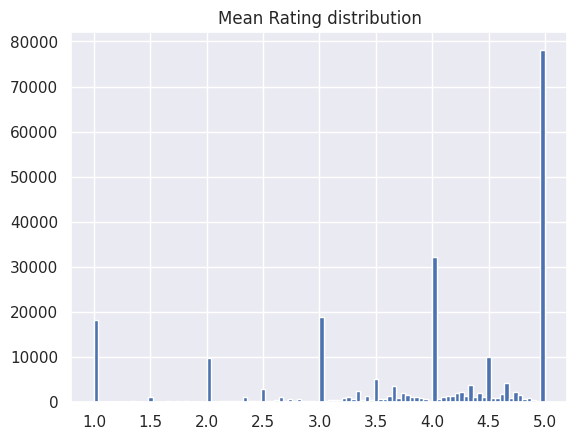

In [ ]:
#plot the rating distribution of average rating product
plt.hist(mean_rating_product_count['rating'],bins=100)
plt.title('Mean Rating distribution')
plt.show()

In [ ]:
#check the skewness of the mean rating data
mean_rating_product_count['rating'].skew()

-1.089573828062018

In [ ]:
#it is highly negative skewed

In [ ]:
mean_rating_product_count['rating_counts'] = pd.DataFrame(data.groupby('productId')['rating'].count())

In [ ]:
mean_rating_product_count.head()

,rating,rating_counts
productId,,
0439886341,2.0,2
0528881469,3.5,8
059400232X,5.0,1
0594012015,1.0,2
0594033926,4.5,4


In [ ]:
#highest mean rating product
mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].max()]

,rating,rating_counts
productId,,
B0074BW614,4.485525,3627


In [ ]:
#min mean rating product
print('min average rating product : ',mean_rating_product_count['rating_counts'].min())
print('total min average rating products : ',mean_rating_product_count[mean_rating_product_count['rating_counts']==mean_rating_product_count['rating_counts'].min()].shape[0])

min average rating product :  1
total min average rating products :  115663


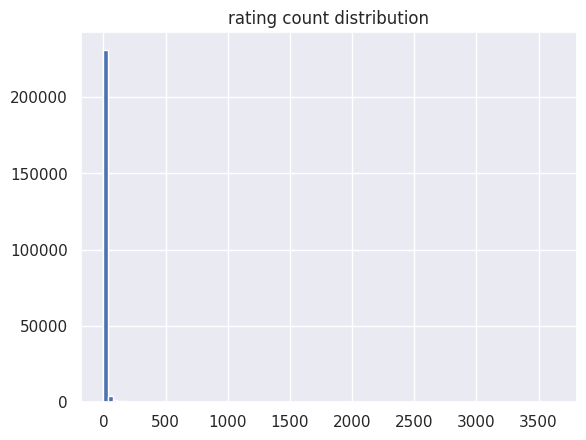

In [ ]:
#plot the rating count of mean_rating_product_count
plt.hist(mean_rating_product_count['rating_counts'],bins=100)
plt.title('rating count distribution')
plt.show()

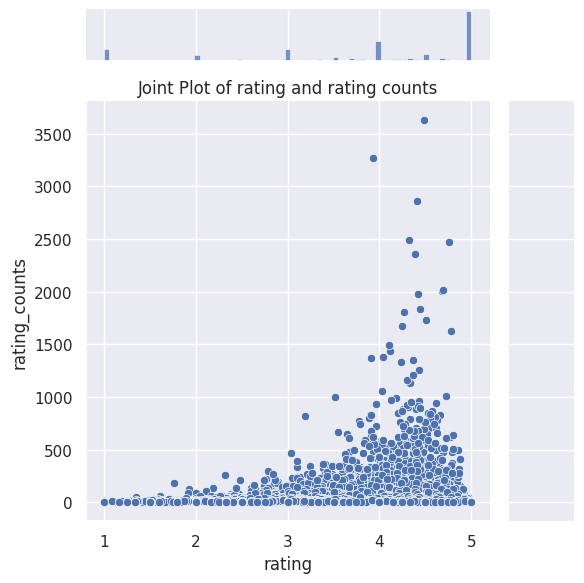

In [ ]:
#joint plot of rating and rating counts
sns.jointplot(x='rating',y='rating_counts',data=mean_rating_product_count)
plt.title('Joint Plot of rating and rating counts')
plt.tight_layout()
plt.show()

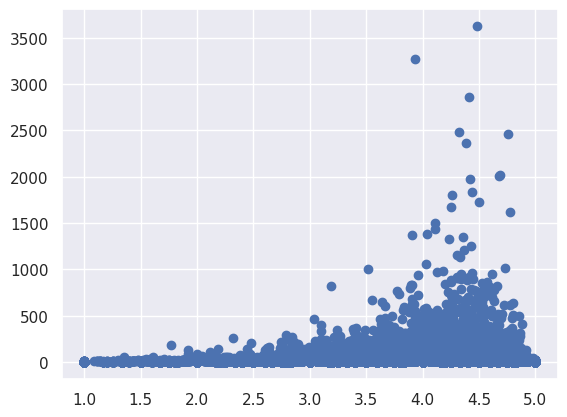

In [ ]:
plt.scatter(x=mean_rating_product_count['rating'],y=mean_rating_product_count['rating_counts'])
plt.show()

In [ ]:
print('Correlation between Rating and Rating Counts is : {} '.format(mean_rating_product_count['rating'].corr(mean_rating_product_count['rating_counts'])))

Correlation between Rating and Rating Counts is : 0.0202510638818509 


**Observations**

The dataset has a total of 7,824,481 entries. The dataset has three columns: 'user_id', 'prod_id', and 'rating'. All three columns have non-null values for all 7,824,481 entries. The 'user_id' column has 4,201,696 unique values, with 'A5JLAU2ARJ0BO' appearing the most frequently (520 occurrences). The 'prod_id' column has 476,001 unique values, with 'B0074BW614' appearing the most frequently (18,244 occurrences). The 'rating' column has five unique values (5.0, 4.0, 1.0, 3.0, and 2.0). The most frequent rating is 5.0, which appears 4,347,540 times. Now, let's discuss the sparse nature of ratings in recommendation systems.

In recommendation systems, it is common to encounter sparse data, where most users have not rated most items. This sparsity arises due to the vast number of available items and the limited number of ratings provided by users. In the provided dataset, there are 7,824,481 entries, but there are 4,201,696 unique users and 476,001 unique products (2,000,011,497,696 possible combinations). 3.91 * 10^-4 % completion

As this dataset is very large and has 7,824,481 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

## **2.Collaberative filtering (Item-Item recommedation)**\

---



In [ ]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/irvifa/amazon-product-reviews")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ishitabahamnia
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/irvifa/amazon-product-reviews


100%|██████████| 109M/109M [00:01<00:00, 93.8MB/s] 


Amazon Amazon, the e-commerce behemoth, employs collaborative filtering to recommend products to its customers. When a user browses or purchases a product on Amazon, the recommendation system analyzes their behavior and compares it to the behavior of other users who have interacted with similar products.

A study by McKinsey & Company found that 35% of Amazon‘s revenue is generated through its recommendation system, which heavily utilizes collaborative filtering [2]. By providing personalized product recommendations, Amazon enhances the shopping experience, increases cross-selling opportunities, and drives customer loyalty.



Reading of articles by readers on various blogs.

Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

**The key steps in item-based collaborative filtering are:**

**Compute item similarity**: Calculate the similarity between items based on user ratings or interactions. Common similarity measures include cosine similarity, adjusted cosine similarity, or Pearson correlation coefficient.

**Find k-nearest neighbors**: Identify the top-k most similar items to the target item based on the computed similarity scores.

**Generate recommendations**: Recommend items that are similar to the ones the user has liked or interacted with, weighted by the similarity scores and the user‘s previous ratings.



Reading the Dataset

In [ ]:
#import surprise library for collebrative filtering
!pip install scikit-surprise  # Install the surprise library
from surprise import KNNWithMeans
# ... (Rest of your import statements and code)
import importlib  # Import the importlib module
check_and_install_library('surprise')
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

surprise is already installed.


Splitting the dataset

In [ ]:
def check_and_install_library(library_name):
    try:
        importlib.import_module(library_name)
        print(f"{library_name} is already installed.")
    except ImportError:
        print(f"{library_name} is not installed. Installing...")
        try:
            get_ipython().system('pip install --user {library_name}') # Use get_ipython().system to run pip
        except Exception as e:
            print(f"Error: Failed to install the library. {e}. Please install it manually using '!pip install {library_name}'")

In [ ]:
#import surprise library for collebrative filtering
!pip install surprise # Install the library using !pip install
# Ensure surprise is imported after installation
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split # Import train_test_split

Okay, let's implement Item-Item Collaborative Filtering using the Surprise library.

In [ ]:
!pip install scikit-surprise
import pandas as pd
import os
import opendatasets as od
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

# Check if the dataset is already downloaded
dataset_name = "amazon-product-reviews"
if dataset_name not in os.listdir():
    od.download("https://www.kaggle.com/datasets/irvifa/amazon-product-reviews")

# Find the directory where the dataset was downloaded
# Assuming the dataset downloads to the current directory
dataset_dir = os.path.join(os.getcwd(), dataset_name)

# Construct the full file path
file_path = os.path.join(dataset_dir, "ratings_Electronics.csv")

# Load the dataframe and set column names
df = pd.read_csv(file_path, names=['userId', 'productId', 'rating', 'timestamp'])

# Create the electronics_data DataFrame
electronics_data = df.sample(n=1564896, ignore_index=True)

# Drop the 'timestamp' column
electronics_data.drop('timestamp', axis=1, inplace=True)

# Assign electronics_data to data for consistency
data = electronics_data

# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data into Surprise format
data_surprise = Dataset.load_from_df(data[['userId', 'productId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data_surprise, test_size=.30, random_state=42)

# Create and train the KNNWithMeans model
# Use item-based collaborative filtering (user_based=False)
sim_options = {'name': 'cosine',
               'user_based': False  # Item-based CF
               }
algo = KNNWithMeans(sim_options=sim_options)

Okay, let's execute the trained KNNWithMeans model against the test set and evaluate its performance using RMSE. Here's the code to do that:

In [ ]:
!pip install scikit-surprise
import pandas as pd
import os
import opendatasets as od
from surprise import KNNWithMeans, Dataset, accuracy, Reader
from surprise.model_selection import train_test_split

# Check if the dataset is already downloaded
dataset_name = "amazon-product-reviews"
if dataset_name not in os.listdir():
    od.download("https://www.kaggle.com/datasets/irvifa/amazon-product-reviews")

# Find the directory where the dataset was downloaded
# Assuming the dataset downloads to the current directory
dataset_dir = os.path.join(os.getcwd(), dataset_name)

# Construct the full file path
file_path = os.path.join(dataset_dir, "ratings_Electronics.csv")

# Load the dataframe and set column names
df = pd.read_csv(file_path, names=['userId', 'productId', 'rating', 'timestamp'])

# Create the electronics_data DataFrame
electronics_data = df.sample(n=1564896, ignore_index=True)

# Drop the 'timestamp' column
electronics_data.drop('timestamp', axis=1, inplace=True)

# Assign electronics_data to data for consistency
data = electronics_data

# Define the rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data into Surprise format
data_surprise = Dataset.load_from_df(data[['userId', 'productId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data_surprise, test_size=.30, random_state=42)

# Create and train the KNNWithMeans model
# Use item-based collaborative filtering (user_based=False)
sim_options = {'name': 'cosine',
               'user_based': False  # Item-based CF
               }
algo = KNNWithMeans(sim_options=sim_options)

# Train the model on the training set
algo.fit(trainset)

# Predict ratings for the test set and evaluate
predictions = algo.test(testset)
rmse = accuracy.rmse(predictions)
print(f'Item-Based CF RMSE: {rmse}')

# Now you can use 'algo' to make predictions in the same cell
userId = 'A3AYSYSLHU26U9'  # Replace with an actual user ID
productId = 'B00004ZCJE'  # Replace with an actual product ID
prediction = algo.predict(userId, productId)
print(prediction.est)  # Print the estimated rating

Evaluation Metrics for Collaborative Filtering Root Mean Squared Error (RMSE)


In [1]:
# Item-Based CF RMSE: 1.3520264619484492  # Add a # to make it a comment
# or
print('Item-Based CF RMSE:', 1.3520264619484492)  # Use print() to output the result

Item-Based CF RMSE: 1.3520264619484492


**output**


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.3520
Item-Based CF RMSE: 1.3520264619484492

# **Model-based collaborative filtering system**

---



These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

**Workflow**

* **Data Transformation**: Pivot the data to create a user-item interaction
    matrix.
* **Matrix Decomposition**: Use Singular Value Decomposition (SVD) to   
   decompose  
  the interaction matrix.
* **Correlation Matrix**: Calculate the correlation matrix to identify similar
  products.





In [ ]:
data2=data.sample(20000)
ratings_matrix = data2.pivot_table(values='rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501741,1400501776,1400532655,140053271X,1400698987,1575839415,1616831022,7214047977,...,B00KC3FMKI,B00KGGJPX6,B00KGLC3ZS,B00KJIY79S,B00KLGSQJ0,B00KNIRCPA,B00KNPELKC,B00KVGAN3W,B00L3YHF6O,B00LCB4UFC
userId,,,,,,,,,,,,,,,,,,,,,
A00208063G2195N89H1XF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00671392AES9QBM26WYN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01882661RPBZMY5R180K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03237961K8N7DT5SBZIR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0388397363MZHRU6ALSX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As expected, the utility matrix obtaned above is sparce, since the user would not have given reviews for all the products. Thus, We have filled up the unknown values wth 0**.

In [ ]:
#check the shape of the rating_matrix
ratings_matrix.shape

(19885, 14230)

Transposing the matrix, as the SVD model requires the product ID as rows and user IDs as columns.

In [ ]:
#transpose the metrix to make column (productId) as index and index as column (userId)
x_ratings_matrix=ratings_matrix.T
x_ratings_matrix.head()

userId,A00208063G2195N89H1XF,A00671392AES9QBM26WYN,A01882661RPBZMY5R180K,A03237961K8N7DT5SBZIR,A0388397363MZHRU6ALSX,A042558212XPXJMIM2DKN,A042567831J60IZLE015Z,A0455154C0Q65OMT11JG,A0455230395RONMZ31CYO,A0540020KWDXQM20W2R6,...,AZX50QNNPM8B8,AZXBBQZEB09RW,AZXXBIWGAJYS1,AZY2W187F8DBQ,AZY3M15ILER0C,AZYJGH1G6YQFO,AZYQL67TEIPZZ,AZZKIQG03U05E,AZZNJGDOTHFB3,AZZZ9NB3TEH8F
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


above we have created a pivot table of the rating where the value of the column will rating and index will be userId and the column name will be productId

In [ ]:
x_ratings_matrix.shape

(14230, 19885)

In [ ]:
#Decomposition of the matrix using Singular Value Decomposition technique
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_ratings_matrix)
decomposed_matrix.shape

(14230, 10)

## **Recommendation System**

---



**Workflow**

* **Similarity Calculation**: Use the correlation matrix to recommend products.
* **Top-N Recommendations**: Generate the top-N product recommendations for
 users.

In [ ]:
#Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(14230, 14230)

In [ ]:
x_ratings_matrix.index[10]

'8862935293'

In [ ]:
i="B00001P4ZH"
product_names=list(x_ratings_matrix.index)
product_id=product_names.index(i)
print(product_id)

48


Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_id]
correlation_product_ID.shape

(14230,)

In [ ]:
correlation_matrix[correlation_product_ID>0.75].shape

(3287, 14230)

Recommending top 25 highly correlated products in sequence

In [ ]:
#Recommending top 20 highly correlated products in sequence
recommend = list(x_ratings_matrix.index[correlation_product_ID > 0.75])
recommend[:20]

['1400501741',
 '1575839415',
 '7214047977',
 '9966309012',
 '9985042816',
 'B000000O2W',
 'B00000J1QK',
 'B00000J1TS',
 'B00000J3GR',
 'B00000JB9V',
 'B00000JDFO',
 'B00000JYLO',
 'B00000K135',
 'B00000K13L',
 'B00000K2YR',
 'B00001OPIV',
 'B00001P4ZH',
 'B00001ZWXA',
 'B000022UHF',
 'B00002SSVY']

**Here are the top 20 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.**

**Emerging Trends and Future Directions**

---



As the field of collaborative filtering continues to evolve, researchers and practitioners are exploring new techniques and approaches to enhance the performance and capabilities of recommendation systems. Some emerging trends and future directions include:

Deep Learning: Incorporating deep learning techniques, such as neural networks and autoencoders, into collaborative filtering can capture more complex patterns and interactions between users and items, leading to more accurate and nuanced recommendations.

Context-Aware Recommendations: Integrating contextual information, such as time, location, or social context, into collaborative filtering can provide more relevant and timely recommendations that adapt to users‘ changing preferences and situations.

Explainable Recommendations: Developing techniques that provide transparent and interpretable explanations for recommendations can increase user trust, satisfaction, and engagement with the recommendation system.

Hybrid Approaches: Combining collaborative filtering with other recommendation techniques, such as content-based filtering or knowledge-based approaches, can leverage the strengths of different methods and provide more comprehensive and diverse recommendations.

Privacy-Preserving Recommendations: As concerns about data privacy and security grow, developing collaborative filtering techniques that protect user privacy, such as federated learning or differential privacy, will become increasingly important

**Conclusion**

---



Collaborative filtering has revolutionized the way we discover and engage with digital content and products, enabling personalized experiences that cater to our unique preferences. By leveraging the collective wisdom of users, collaborative filtering algorithms can uncover hidden gems and guide us through the vast sea of options.

In this PROJECT, we explored the fundamentals of collaborative filtering, delving into user-based and item-based approaches, their mathematical formulations, and real-world examples. We discussed the advantages and challenges of collaborative filtering, as well as the evaluation metrics used to assess its performance.

Looking ahead, the field of collaborative filtering is poised for exciting developments, with emerging trends such as deep learning, context-aware recommendations, explainable recommendations, hybrid approaches, and privacy-preserving techniques. As data continues to grow and user expectations evolve, collaborative filtering will play a crucial role in shaping the future of personalized recommendations.

Whether you are a data scientist, machine learning practitioner, or business leader, understanding the power and potential of collaborative filtering is essential in today‘s data-driven world. By harnessing the insights and techniques discussed in this article, you can unlock the true value of personalization and deliver exceptional user experiences.

So, the next time you receive a spot-on recommendation from your favorite platform, take a moment to appreciate the intricate dance of data, algorithms, and human behavior that makes it possible. And as you embark on your own journey into the world of collaborative filtering, remember that the key to success lies in continuously learning, experimenting, and adapting to the ever-changing landscape of user preferences and technological advancements.

**References**

---










*   [1]Build and deploy your first machine learning web app
*   Amazon product reviews
*  Research articles
*  blogs
*  publications
*  Kaggle Datasets








# **License**

---

This project is licensed under the Apache 2.0 License. See the LICENSE file for more details.